In [3]:
pwd

'/Users/surajpawar/Desktop/Loan eligibility using machine learning prediction in python'

In [4]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade scikit-learn imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.4 requires scikit-learn<1.3.0,>=1.0, but you have scikit-learn 1.3.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [1]:
from imblearn.over_sampling import RandomOverSampler

In [4]:
df = pd.read_csv("/Users/surajpawar/Desktop/Loan eligibility using machine learning prediction in python/loan_data.csv")

In [5]:
df.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,4583,128000.0,N
1,Male,Yes,3000,66000.0,Y
2,Male,Yes,2583,120000.0,Y
3,Male,No,6000,141000.0,Y
4,Male,Yes,5417,267000.0,Y


In [7]:
df.shape

(577, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           577 non-null    object 
 1   Married          577 non-null    object 
 2   ApplicantIncome  577 non-null    int64  
 3   LoanAmount       577 non-null    float64
 4   Loan_Status      577 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.7+ KB


In [10]:
df.describe()

,ApplicantIncome,LoanAmount
count,577.000000,577.000000
mean,5297.119584,144968.804159
std,5853.236196,82704.181660
min,150.000000,9000.000000
25%,2889.000000,100000.000000
50%,3800.000000,127000.000000
75%,5746.000000,167000.000000
max,81000.000000,650000.000000


In [11]:
df.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,4583,128000.0,N
1,Male,Yes,3000,66000.0,Y
2,Male,Yes,2583,120000.0,Y
3,Male,No,6000,141000.0,Y
4,Male,Yes,5417,267000.0,Y


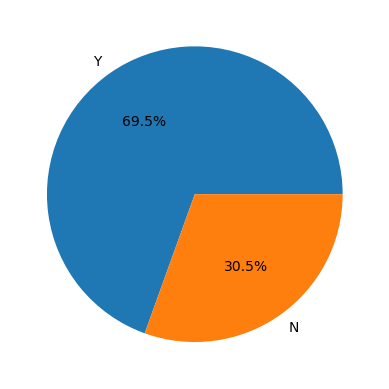

In [14]:
temp = df["Loan_Status"].value_counts()
plt.pie(temp.values, labels = temp.index, autopct = "%1.1f%%")
plt.show()

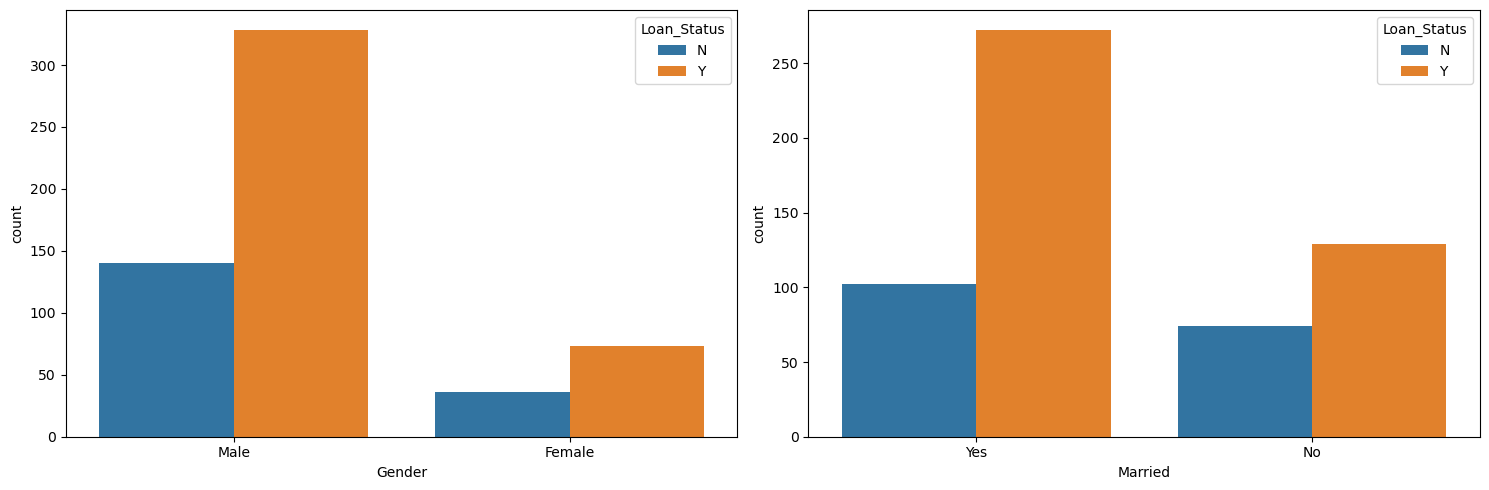

In [15]:
plt.subplots(figsize = (15,5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1,2,i+1)
    sns.countplot(data=df, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()

In [16]:
df.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,4583,128000.0,N
1,Male,Yes,3000,66000.0,Y
2,Male,Yes,2583,120000.0,Y
3,Male,No,6000,141000.0,Y
4,Male,Yes,5417,267000.0,Y


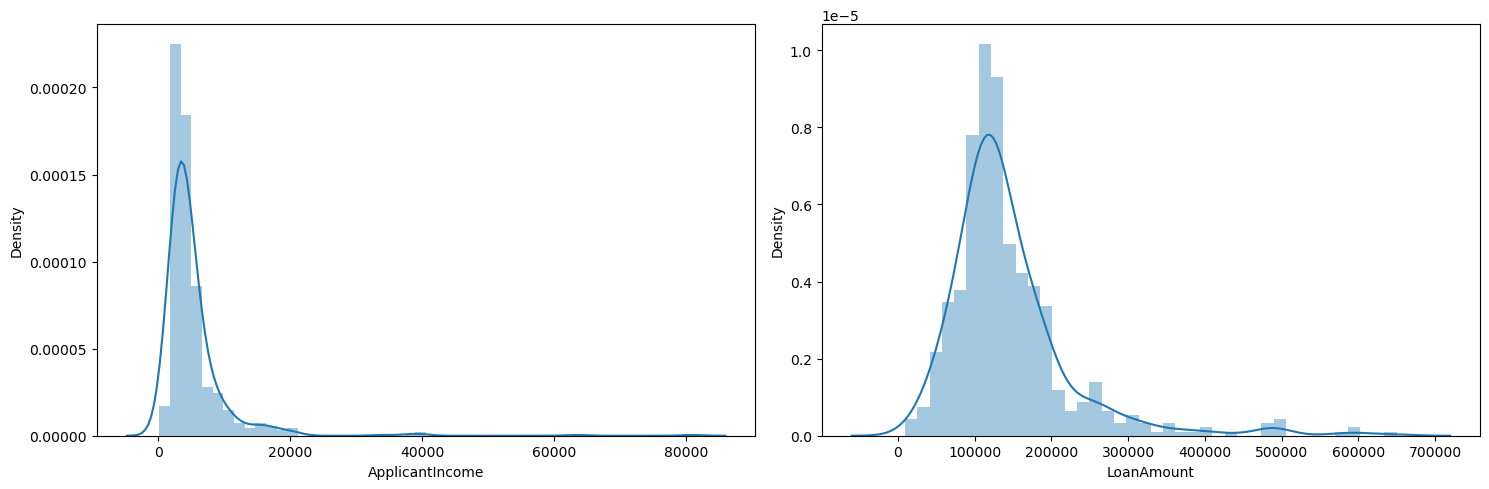

In [18]:
plt.subplots(figsize = (15,5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1,2,i+1)
    sns.distplot(df[col])
plt.tight_layout()
plt.show()

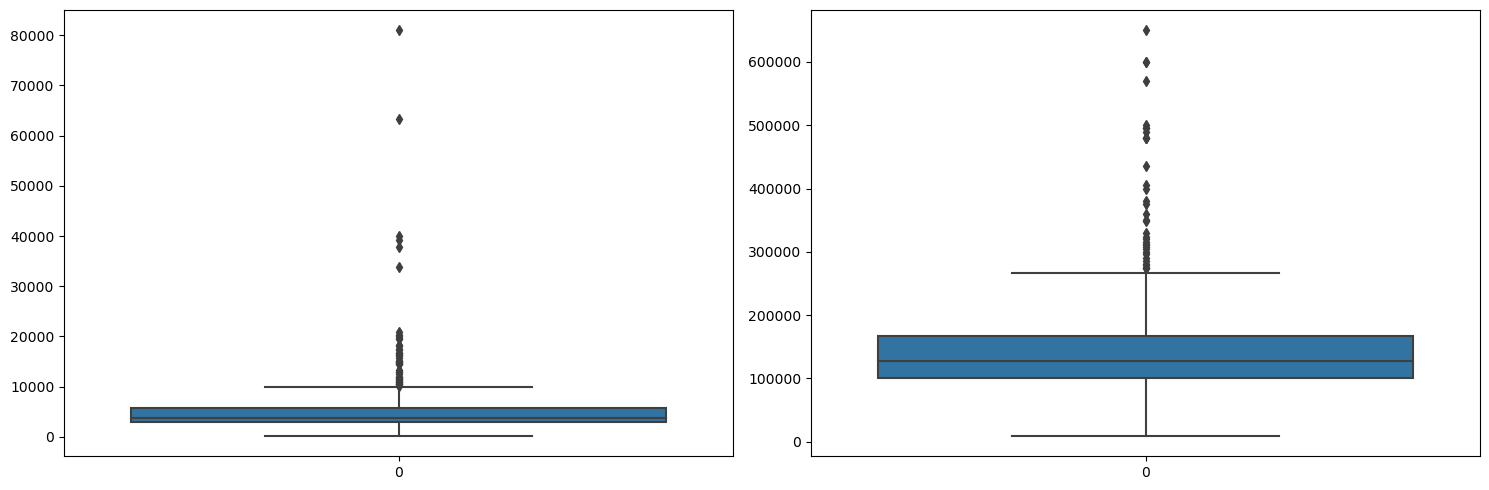

In [20]:
plt.subplots(figsize = (15,5))
for i, col in enumerate(["ApplicantIncome", "LoanAmount"]):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col])
plt.tight_layout()
plt.show()

In [21]:
df = df[df["ApplicantIncome"] < 25000]
df = df[df["LoanAmount"] < 400000]

In [22]:
df.groupby("Gender").mean()['LoanAmount']

Gender
Female    118822.429907
Male      139289.823009
Name: LoanAmount, dtype: float64

In [25]:
df.groupby(["Married", "Gender"]).mean()['LoanAmount']

Married  Gender
No       Female    116115.384615
         Male      126644.628099
Yes      Female    126103.448276
         Male      143912.386707
Name: LoanAmount, dtype: float64

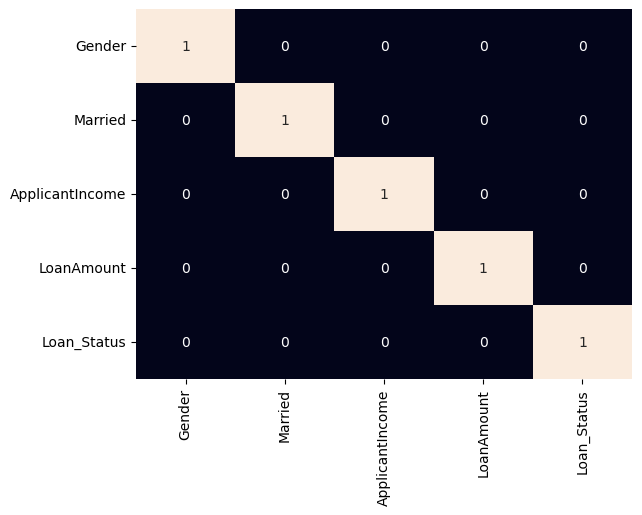

In [26]:
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
    return data

df = encode_labels(df)

sns.heatmap(df.corr() > 0.8, annot = True, cbar = False)
plt.show()

In [27]:
df.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,1,1,4583,128000.0,0
1,1,1,3000,66000.0,1
2,1,1,2583,120000.0,1
3,1,0,6000,141000.0,1
4,1,1,5417,267000.0,1


In [39]:
features = df.drop("Loan_Status", axis=1)
target = df["Loan_Status"].values
xtrain, xvalid, ytrain, yvalid = train_test_split(features, target, test_size=0.2, random_state=10)
ros = RandomOverSampler(sampling_strategy='minority', random_state = 0)
X, Y = ros.fit_resample(xtrain, ytrain)
xtrain.shape, ytrain.shape

((447, 4), (447,))

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
xvalid = scaler.transform(xvalid)

In [42]:
from sklearn.metrics import roc_auc_score
model = SVC(kernel = 'rbf')
model.fit(X,Y)

print("training accuracy: ", metrics.roc_auc_score(Y, model.predict(X)))
print("validation accuracy: ", metrics.roc_auc_score(yvalid, model.predict(xvalid)))
print()

training accuracy:  0.6136363636363635
validation accuracy:  0.4908403026682596



In [43]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
training_roc_auc = roc_auc_score(Y, model.predict(X))
validation_roc_auc = roc_auc_score(yvalid, model.predict(xvalid))
print('training roc auc score', training_roc_auc)
print('validation roc auc score', validation_roc_auc)
print()
cm = confusion_matrix(yvalid, model.predict(xvalid))

training roc auc score 0.6136363636363635
validation roc auc score 0.4908403026682596



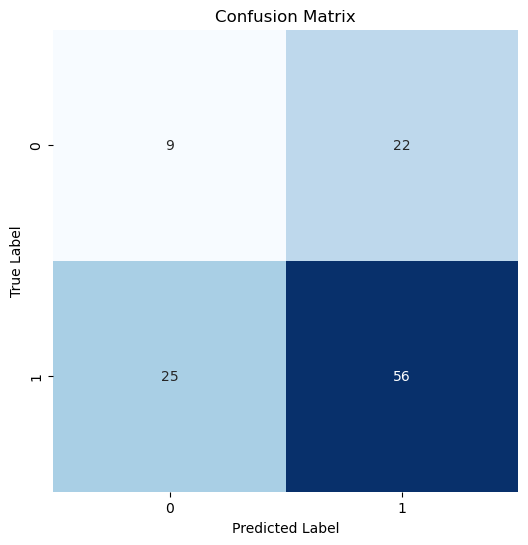

In [44]:
plt.figure(figsize = (6,6))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", cbar = False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, model.predict(xvalid)))

              precision    recall  f1-score   support

           0       0.26      0.29      0.28        31
           1       0.72      0.69      0.70        81

    accuracy                           0.58       112
   macro avg       0.49      0.49      0.49       112
weighted avg       0.59      0.58      0.59       112

